# Title: Single-Mode Photon Blockade Enhanced by Bi-Tone Drive——PRL 129,043601

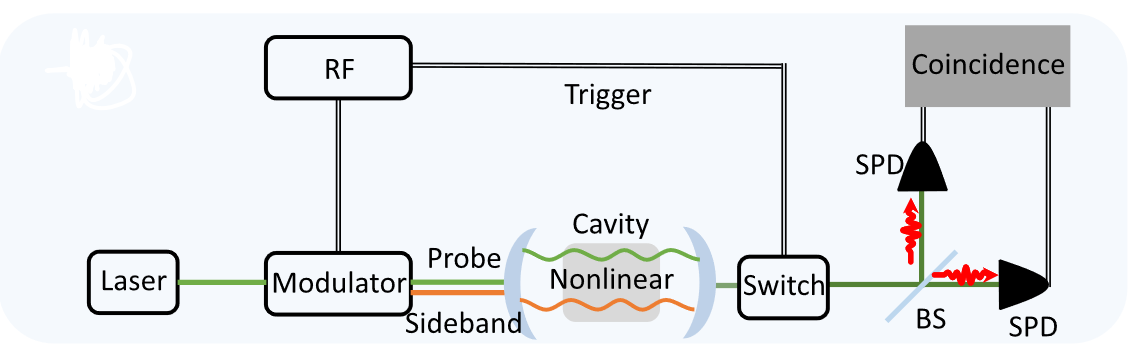

## The effective Hamiltonian

$$H_{\text{eff}}=\left(\omega_a-\frac{i\kappa}{2}\right)a^\dagger a+ga^\dagger a^\dagger a a$$
Here, we can simply obtain $H_{\text{eff}}^{(1)}=\omega_a-i\kappa/2$ and $H_{\text{eff}}^{(2)}=2\omega_a-i\kappa+2g$.

## Equal-time probing two-photon probability amplitude in the case of two coherent state inputs

We assume that the two input channels are $b_1$ and $b_2$, respectively, and we have
$$P_2^{(b_1b_1)}=\sqrt{1}\times\sqrt{\frac{\kappa}{2}}\sqrt{2}\times\sqrt{\frac{\kappa}{2}}\frac{i}{H^{(2)}_{\text{eff}}-2\omega_1}\times(\Omega_1\sqrt{2}e^{-i\omega_1 t})\times\frac{i}{H^{(1)}_{\text{eff}}-\omega_1}\times(\Omega_1\sqrt{1}e^{-i\omega_1 t}) $$
$$P_2^{(b_2b_2)}=\sqrt{1}\times\sqrt{\frac{\kappa}{2}}\sqrt{2}\times\sqrt{\frac{\kappa}{2}}\frac{i}{H^{(2)}_{\text{eff}}-2\omega_2}\times(\Omega_2\sqrt{2}e^{-i\omega_2 t})\times\frac{i}{H^{(1)}_{\text{eff}}-\omega_2}\times(\Omega_2\sqrt{1}e^{-i\omega_2 t}) $$
$$P_2^{(b_1b_2)}=\sqrt{1}\times\sqrt{\frac{\kappa}{2}}\sqrt{2}\times\sqrt{\frac{\kappa}{2}}\frac{i}{H^{(2)}_{\text{eff}}-\omega_1-\omega_2}\times(\Omega_2\sqrt{2}e^{-i\omega_2 t})\times\frac{i}{H^{(1)}_{\text{eff}}-\omega_1}\times(\Omega_1\sqrt{1}e^{-i\omega_1 t}) $$
$$P_2^{(b_2b_1)}=\sqrt{1}\times\sqrt{\frac{\kappa}{2}}\sqrt{2}\times\sqrt{\frac{\kappa}{2}}\frac{i}{H^{(2)}_{\text{eff}}-\omega_1-\omega_2}\times(\Omega_1\sqrt{2}e^{-i\omega_1 t})\times\frac{i}{H^{(1)}_{\text{eff}}-\omega_2}\times(\Omega_2\sqrt{1}e^{-i\omega_2 t}) $$
where $\Omega_k$ and $\omega_k$ represent the driving strength and frequency of input channel $b_k$, respectively.

Now, let the summation of the four probability amplitudes is equal to zero, and we have
$$\sum_{k,j=1}^{2}P_2^{(b_kb_j)}=0\Longrightarrow F(\omega_1)+F(\omega_2)\tilde{\Omega}^2(t)+\left[G(\omega_1,\omega_2)+G(\omega_2,\omega_1)\right]\tilde{\Omega}(t)=0, $$
where $F(\omega)=\frac{1}{\omega_a-\omega-i\kappa/2}\frac{1}{2(\omega_a-\omega)-i\kappa+2g}$, $G(\omega_1,\omega_2)=\frac{1}{\omega_a-\omega_1-i\kappa/2}\frac{1}{(\omega_a-\omega_1)+(\omega_a-\omega_2)-i\kappa+2g}$, and $\tilde{\Omega}(t)=[\Omega_2/\Omega_1]e^{-i(\omega_2-\omega_1)t}$.

### Specific parameters
When $\omega_a=\omega_1$, $U=g/\kappa$, $\omega_2-\omega_1=\Delta\kappa$, and $\eta=\Omega_2/\Omega_1$, the equation above could be written as 
$$-\frac{2}{1+2iU}+\frac{2}{2\Delta+i}\frac{1}{2\Delta+i-2U}x^2+\frac{-1}{\Delta+i-2U}\left[2i-\frac{2}{2\Delta+i} \right]x=0,  $$
where $x=\eta \exp({-i\Delta\kappa t})$.

Here, we choose $U=0.01$ and $\Delta=2\pi/21$, and we have two solutions: $x_1=1.22025e^{2.57938i}$ and $x_2=1.10305e^{2.62018i}$, which means $\eta=1.22025$ or $\eta=1.10305$.

In [1]:
from qcs_phy import qcs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# system fixed parameters
κ = 1
U = 0.01
ωa = 0
ω1 = ωa
ω2 = 2*np.pi/21+ω1

tlist = np.linspace(60, 120, 50000)

### Figure 2.(a)
$$\eta=1.22025$$

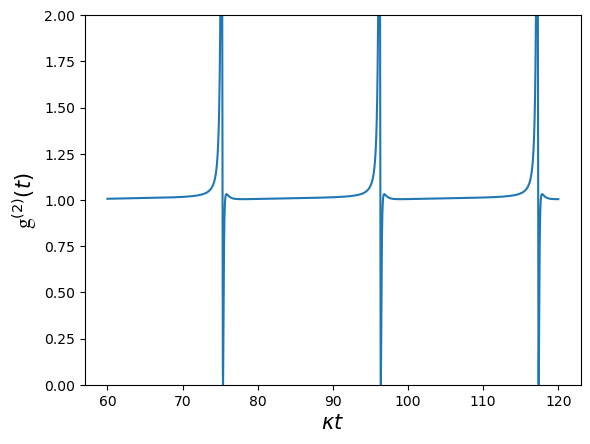

In [14]:
# construct Input and Output channels
mode_i = [np.sqrt(κ/4), ("a", 0)]
mode_o = [np.sqrt(κ/2), ("a", 0)]
Input_1 = qcs.Input_channel("b1", mode_i, ω1)
Input_2 = qcs.Input_channel("b2", mode_i, ω2)

Output = qcs.Output_channel("c", mode_o)
Input = [Input_1, Input_2]
# the ratio of driving strength
η=1.22025
ratio = [1, η]


# construct effective Hamiltonian and calculate dynamical 2nd-order ETCF

Heff = []
Heff.append([(ωa-1j*κ/2), ("ad", 0), ("a", 0)])
Heff.append([U, ("ad", 0), ("ad", 0), ("a", 0), ("a", 0)])

result = qcs(Heff, Input, Output, ratio)
g2_t_1 = result.calculate_quantity("cc", tlist)

plt.plot(tlist, g2_t_1)
plt.ylim([0, 2])
plt.xlabel(r"$\kappa t$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"g$^{(2)}(t)$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

### Figure 2.(a')
$$\eta=1.10305$$

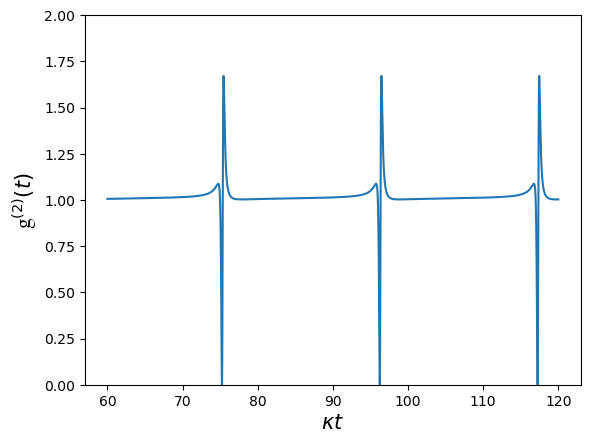

In [15]:
# construct Input and Output channels
mode_i = [np.sqrt(κ/4), ("a", 0)]
mode_o = [np.sqrt(κ/2), ("a", 0)]
Input_1 = qcs.Input_channel("b1", mode_i, ω1)
Input_2 = qcs.Input_channel("b2", mode_i, ω2)

Output = qcs.Output_channel("c", mode_o)
Input = [Input_1, Input_2]
# the ratio of driving strength
η=1.10305
ratio = [1, η]

# construct effective Hamiltonian and calculate dynamical 2nd-order ETCF

Heff = []
Heff.append([(ωa-1j*κ/2), ("ad", 0), ("a", 0)])
Heff.append([U, ("ad", 0), ("ad", 0), ("a", 0), ("a", 0)])

result = qcs(Heff, Input, Output, ratio)
g2_t_2 = result.calculate_quantity("cc", tlist)


plt.plot(tlist, g2_t_2)
plt.ylim([0, 2])
plt.xlabel(r"$\kappa t$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"g$^{(2)}(t)$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

### Figure 2.(b)

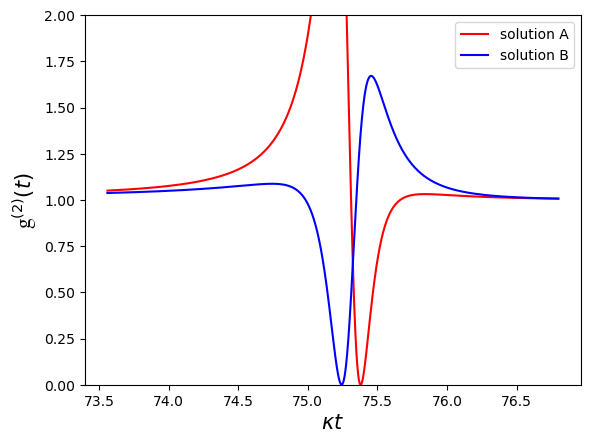

In [23]:
plt.plot(tlist[11300:14000], g2_t_1[11300:14000],'r',label='solution A')
plt.plot(tlist[11300:14000], g2_t_2[11300:14000], 'b',label='solution B')
plt.ylim([0,2])
plt.xlabel(r"$\kappa t$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"g$^{(2)}(t)$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

### Figure 2.(c) and (d)

$$-\frac{2}{1+2iU}+\frac{2}{2\Delta+i}\frac{1}{2\Delta+i-2U}x^2+\frac{-1}{\Delta+i-2U}\left[2i-\frac{2}{2\Delta+i} \right]x=0$$
$$\Longrightarrow x_1 = r_1e^{i\theta_1}=\eta e^{-i\Delta\kappa t}\ and\ x_2 = r_2e^{i\theta_2}=\eta e^{-i\Delta\kappa t}$$